## Fake News Classification 

In [191]:
#importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [192]:
dfnews = pd.read_csv('news_articles.csv')

In [193]:
dfnews.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [194]:
dfnews.sample(10)

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
1879,GPD,2016-10-30T10:08:39.252+02:00,time for fbi director comey to go,has anyone noticed how earnest mr earnest beco...,spanish,voltairenet.org,No Image URL,bs,Fake,reasons bernie voter vote trump,josh earnest would make joseph goebbels proud,0.0
91,Anonymous,2016-10-29T20:55:00.000+03:00,no title,draining the swamp youtubecomwatchvotakuaoi,english,abeldanger.net,No Image URL,bs,Fake,title,draining swamp youtubecomwatchvotakuaoi,0.0
951,noreply@blogger.com (Der Postillon),2016-11-02T10:36:18.114+02:00,newsticker,donnerstag november oettinger ich habe nicht...,german,der-postillon.com,https://4.bp.blogspot.com/-FzQjNL-ha94/WBnYVyG...,bs,Fake,polizei fasst mann der seit jahrzehnten deckel...,für ein speckdackel fettleibiger jagdhund blei...,1.0
1594,No Author,2016-10-28T03:13:46.387+03:00,iraqi forces score major gains south of mosul,on today at pm duterte wants foreign troops ...,english,presstv.ir,http://media.presstv.com/photo/20161027/d3bfdb...,state,Real,trump vps plane slides runway new york airport,reply today pm part mother child worship https...,1.0
597,No Author,2016-10-28T20:13:00.000+03:00,ways to know for sure that what youre drinking...,email ever wonder whats on the mind of todays ...,english,clickhole.com,http://images.onionstatic.com/clickhole/3431/3...,satire,Fake,ways know sure youre drinking clickhole,email ever wonder whats mind todays notable pe...,1.0
1112,Daniel Greenfield,2016-11-02T17:19:02.038+02:00,fbi investigates saudi wifeabusing clinton fou...,majority of americans side with fbi over hilla...,english,frontpagemag.com,http://www.frontpagemag.com/sites/default/file...,hate,Real,college forces mandatory microaggression sessi...,go article nothing ought plainer yet nothing o...,1.0
1220,The Independent,2016-10-28T18:51:02.589+03:00,social media activity can show early signs of ...,draftourdaughters prowar hillary faces backlas...,english,infowars.com,http://hw.infowars.com/wp-content/uploads/2016...,conspiracy,Fake,black activist blasts hillary clinton wikileak...,globalists behind rigged us elections election...,1.0
1461,Jason Easley,2016-10-30T09:09:00.000+02:00,comeys october surprise blows up in his face a...,us admits afghan strike likely caused civilian...,english,politicususa.com,http://15130-presscdn-0-89.pagely.netdna-cdn.c...,bias,Real,fox news gets destroyed trying blame hillary c...,russia russian president vladimir putin delive...,1.0
733,EdJenner,2016-11-02T17:01:06.208+02:00,hillary implodes trump took everythingpaid not...,describing what she calls a crisis of whitenes...,english,dailywire.com,http://conservativeangle.com/wp-content/upload...,bias,Real,hillary implodes trump took everythingpaid not...,describing calls crisis whiteness amanda taub ...,1.0
988,noreply@blogger.com (Der Postillon),2016-11-15T14:14:14.708+02:00,flitzer auf dem spielfeld schachwm muss kurzze...,mittwoch november einigung bei regierungsbil...,german,der-postillon.com,https://3.bp.blogspot.com/-C9_E0fWc_bg/WCswG2M...,bs,Fake,newsticker,donnerstag november krankenhaus führt operatio...,1.0


In [195]:
dfnews.describe()

,hasImage
count,2095.000000
mean,0.777088
std,0.416299
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [196]:
#display info about dataset 

dfnews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096 entries, 0 to 2095
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   author                   2096 non-null   object 
 1   published                2096 non-null   object 
 2   title                    2096 non-null   object 
 3   text                     2050 non-null   object 
 4   language                 2095 non-null   object 
 5   site_url                 2095 non-null   object 
 6   main_img_url             2095 non-null   object 
 7   type                     2095 non-null   object 
 8   label                    2095 non-null   object 
 9   title_without_stopwords  2094 non-null   object 
 10  text_without_stopwords   2046 non-null   object 
 11  hasImage                 2095 non-null   float64
dtypes: float64(1), object(11)
memory usage: 196.6+ KB


In [197]:
#size of dataset 
dfnews.shape


(2096, 12)

# Data Cleaning :

In [198]:
#check for all null values
dfnews.isna().sum()

author                      0
published                   0
title                       0
text                       46
language                    1
site_url                    1
main_img_url                1
type                        1
label                       1
title_without_stopwords     2
text_without_stopwords     50
hasImage                    1
dtype: int64

In [199]:
#drop all the null values
dfnews.dropna(inplace=True)

In [200]:
#Step  1- Dummiy the values in the label column , to represent Real and Fake by 1 and 0
#Step 2-Create new columns name 'real' 

dum_type=pd.get_dummies(dfnews.label,drop_first=True,prefix="")
dfnews=dfnews.join(dum_type)
dfnews.drop('label', axis=1, inplace=True)
dfnews.rename(columns={'_Real':'Real'}, inplace=True)

# EDA :

In [206]:
counews=dfnews['Real'].value_counts()
counews

0    1291
1     754
Name: Real, dtype: int64

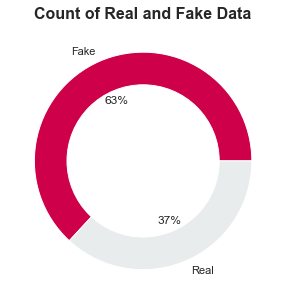

In [207]:
#Q1 :How many Real and Fake news in the dataset? 


names= ['Fake','Real']
my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(counews,labels=names,colors=['#cd0049','#e9ecec'],autopct='%.0f%%')
p=plt.gcf()
sns.set(rc={'figure.figsize':(10,5)})   #64058f


p.gca().add_artist(my_circle)
plt.title('Count of Real and Fake Data', fontdict = {'fontsize': 16},weight = 'bold')
plt.show()

In [208]:
#Q2 : What is the news type?

import plotly.express as px
fig = px.pie(dfnews,names='type',title='Types of Articles')
fig.show()

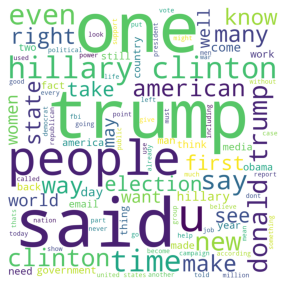

In [209]:
from wordcloud import WordCloud 
wc = WordCloud(background_color="white", max_words=100,
               max_font_size=256,
               random_state=42, width=1000, height=1000)
wc.generate(' '.join(dfnews['text_without_stopwords']))
plt.imshow(wc)
plt.axis('off')
plt.show()

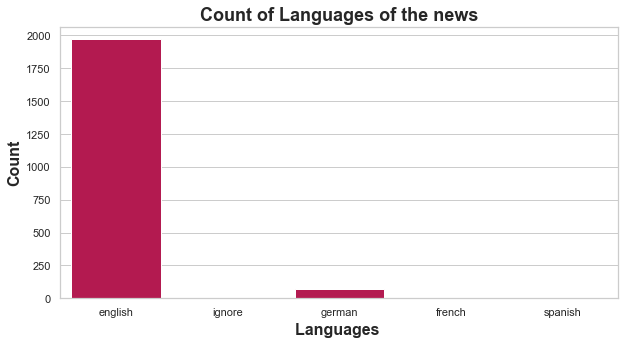

In [210]:
# What is the Languages in the dataset?
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="language", data=dfnews, palette=['#cd0049','#e9ecec'])
ax.set_title("Count of Languages of the news",fontdict = {'fontsize': 18},weight = 'bold');
plt.xlabel('Languages ',fontdict = {'fontsize': 16},weight = 'bold');
plt.ylabel('Count',fontdict = {'fontsize': 16},weight = 'bold');

sns.set(rc={'figure.figsize':(25,12)})



In [211]:
dfnews['type'].value_counts()

bs            598
conspiracy    430
bias          389
hate          244
satire        146
state         121
junksci       102
fake           15
Name: type, dtype: int64

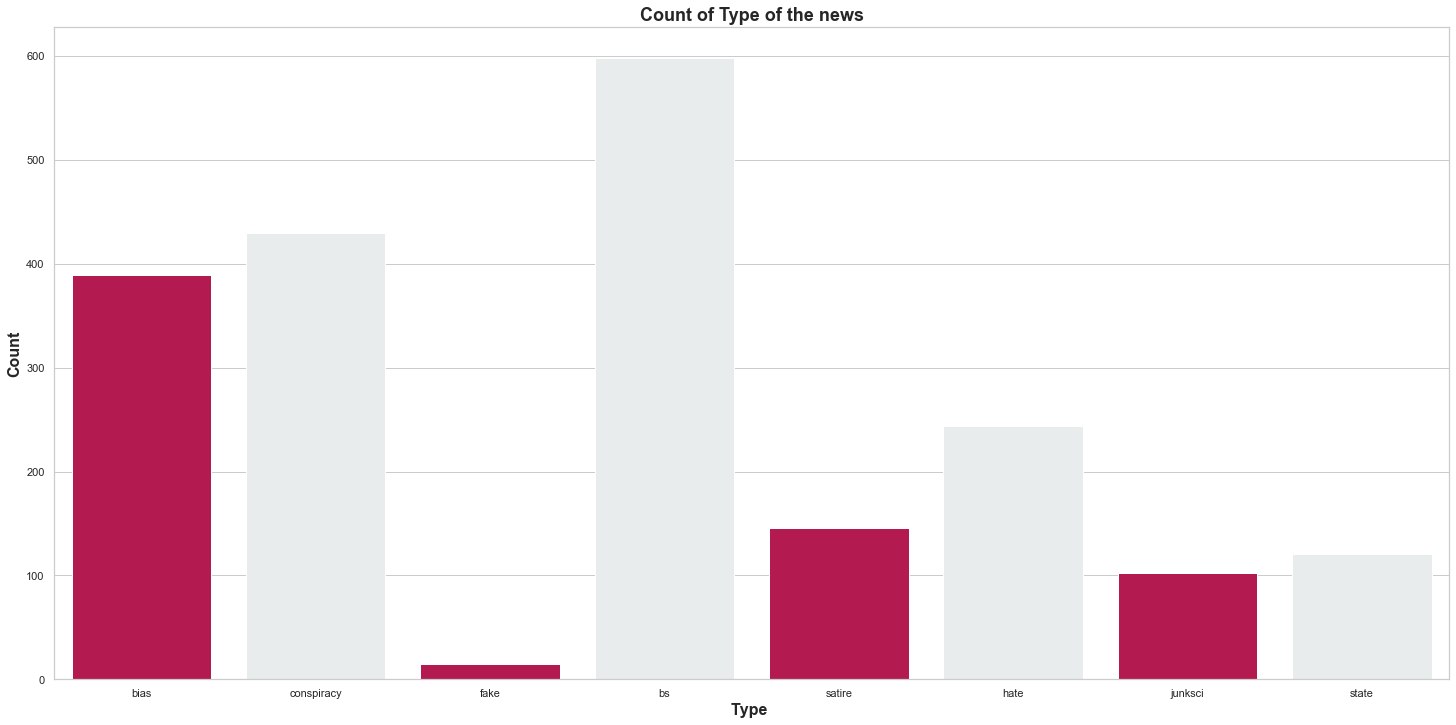

In [212]:
#plot to see Counts of type of news data
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="type", data=dfnews, palette=['#cd0049','#e9ecec'])
ax.set_title("Count of Type of the news",fontdict = {'fontsize': 18},weight = 'bold');
plt.xlabel('Type ',fontdict = {'fontsize': 16},weight = 'bold');
plt.ylabel('Count',fontdict = {'fontsize': 16},weight = 'bold');



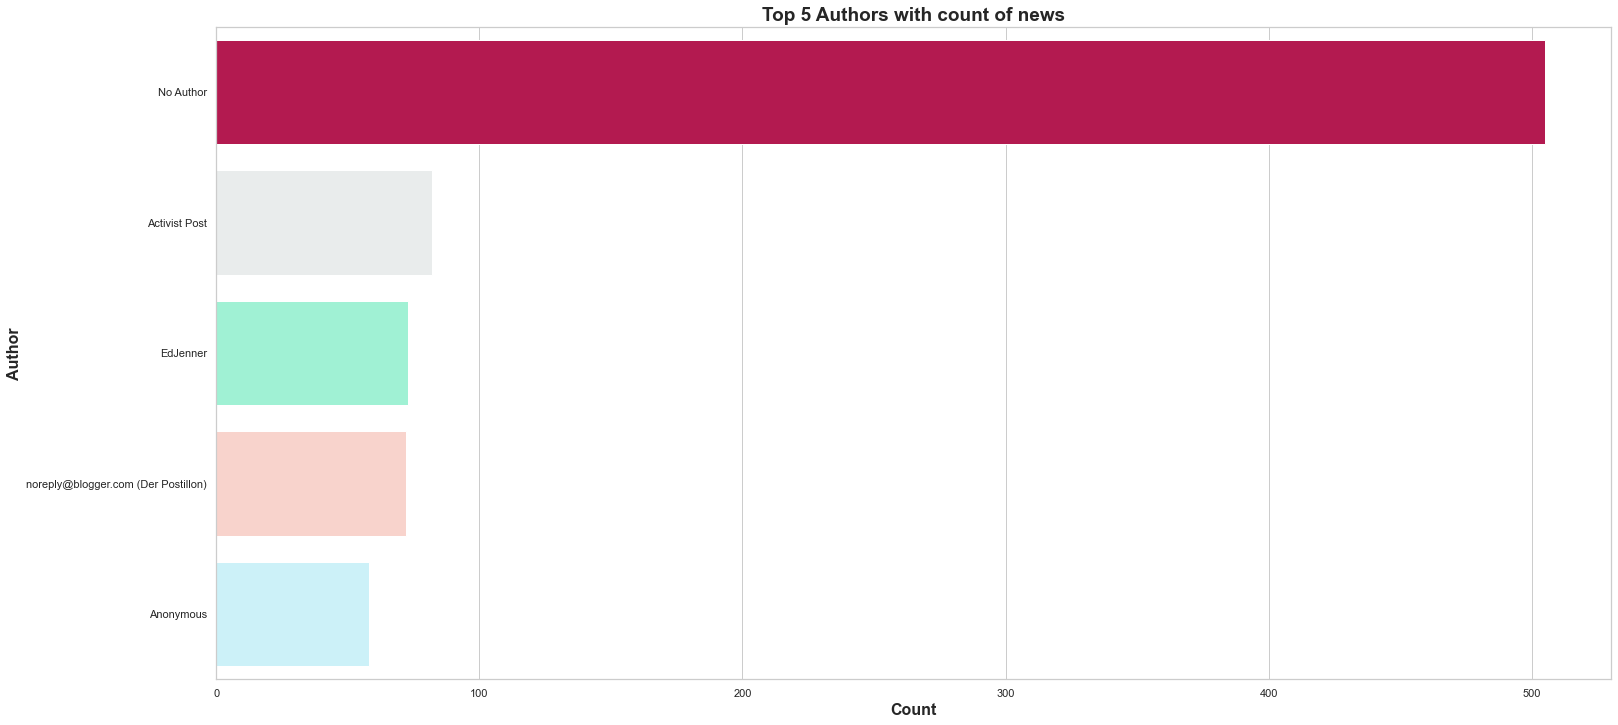

In [213]:
# Who is the top 5 author with the highest news?

sns.set_theme(style="whitegrid")
ax = sns.countplot(y="author", data=dfnews, palette=['#cd0049','#e9ecec','#92ffd8','#ffcec5','#c5f6ff'
                                                 ], order =dfnews.author.value_counts().iloc[:5].index)

ax.set_title("Top 5 Authors with count of news",fontdict = {'fontsize': 19},weight = 'bold')

plt.xlabel('Count',fontdict = {'fontsize': 16},weight = 'bold');
plt.ylabel('Author',fontdict = {'fontsize': 16},weight = 'bold');


sns.set(rc={'figure.figsize':(25,12)})





#'#989882','#ab5c58','#799abb','#79403d','#d5adac','#bb7b79'

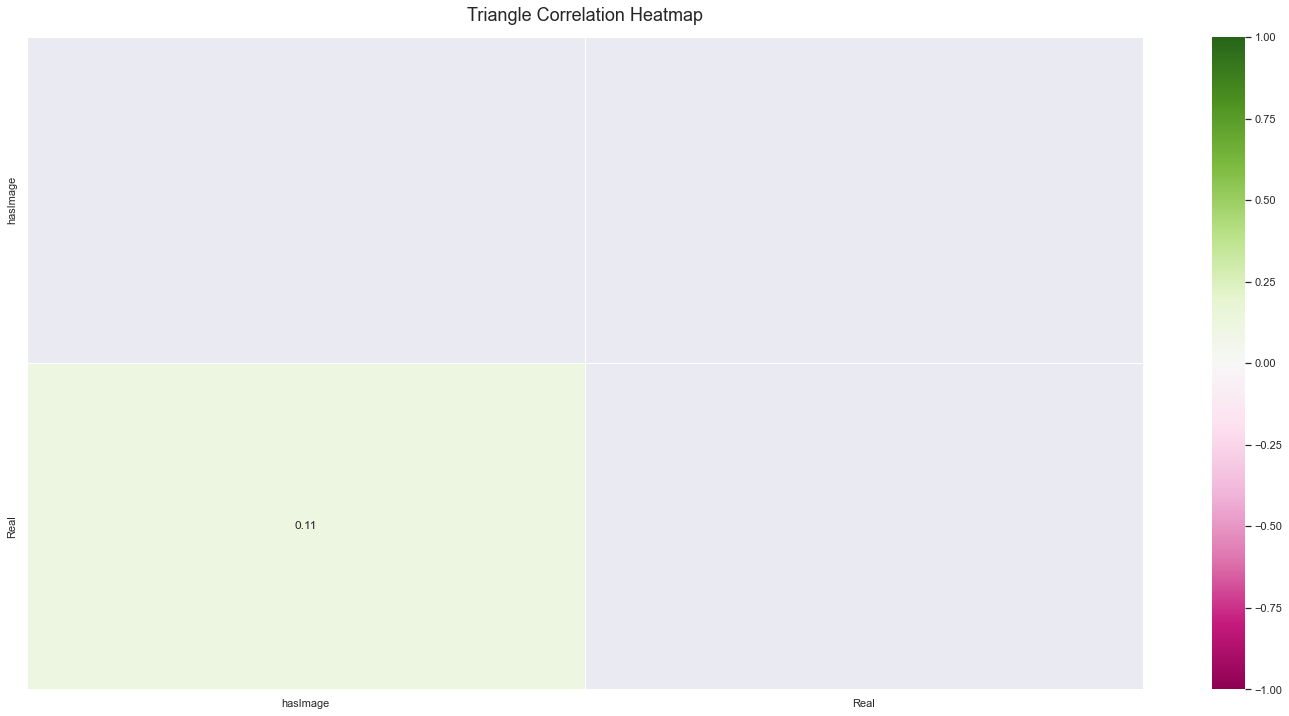

In [215]:
mask = np.triu(np.ones_like(dfnews.corr(), dtype=np.bool))
heatmap = sns.heatmap(dfnews.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='PiYG',linewidths=1,fmt='.2f')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [216]:
nimg=dfnews['hasImage'].value_counts()

nimg

1.0    1580
0.0     465
Name: hasImage, dtype: int64

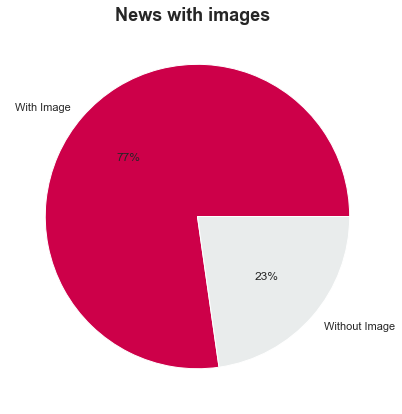

In [217]:
#How many news in the dataset that have images or not?

nimg=dfnews['hasImage'].value_counts()

labels=['With Image','Without Image']

sns.set(rc={'figure.figsize':(11,7)})


plt.pie(nimg, labels=labels ,colors=['#cd0049','#e9ecec'],autopct='%.0f%%');
plt.title('News with images  ', fontdict = {'fontsize': 18},weight = 'bold');






In [220]:
dfnews.columns

Index(['author', 'published', 'title', 'text', 'language', 'site_url',
       'main_img_url', 'type', 'title_without_stopwords',
       'text_without_stopwords', 'hasImage', 'Real'],
      dtype='object')

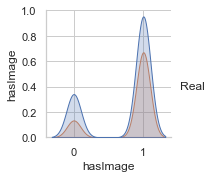

<Figure size 1008x1008 with 0 Axes>

In [221]:


sns.set_theme(style="whitegrid")


sns.pairplot(dfnews, hue='Real');

sns.set(rc={'figure.figsize':(15,12)})
plt.figure(figsize = (14,14)) ;




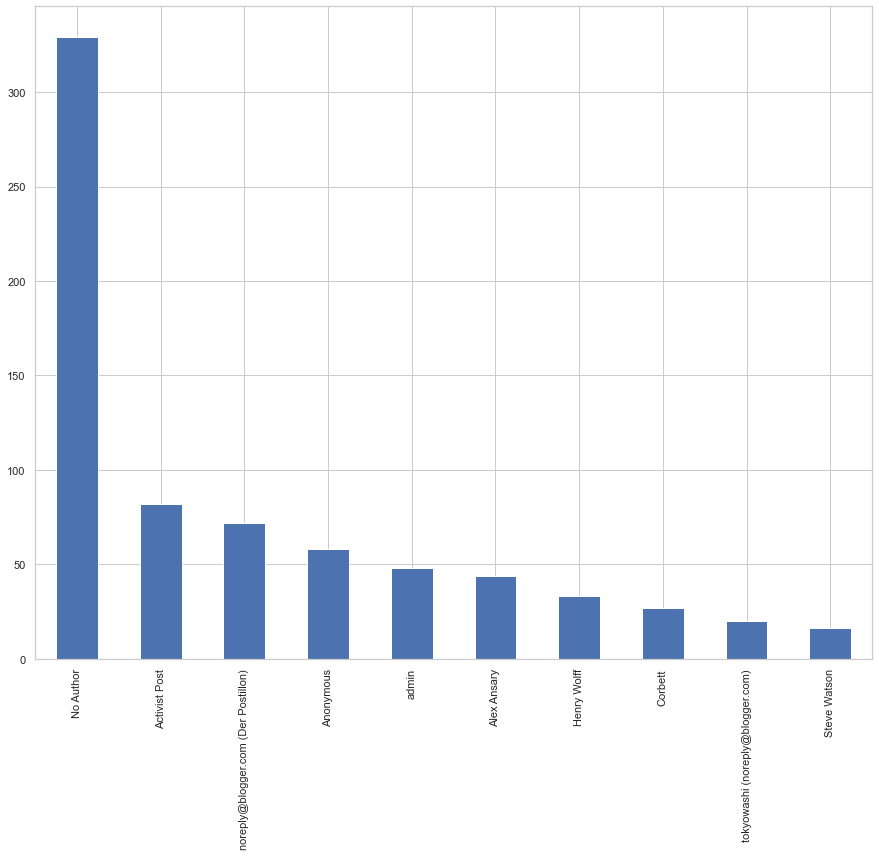

In [222]:
#Fake Authors
sns.set_theme(style="whitegrid")


Fn=dfnews.loc[dfnews.Real == 0].author.value_counts().head(10).plot(kind='bar');

Fn;

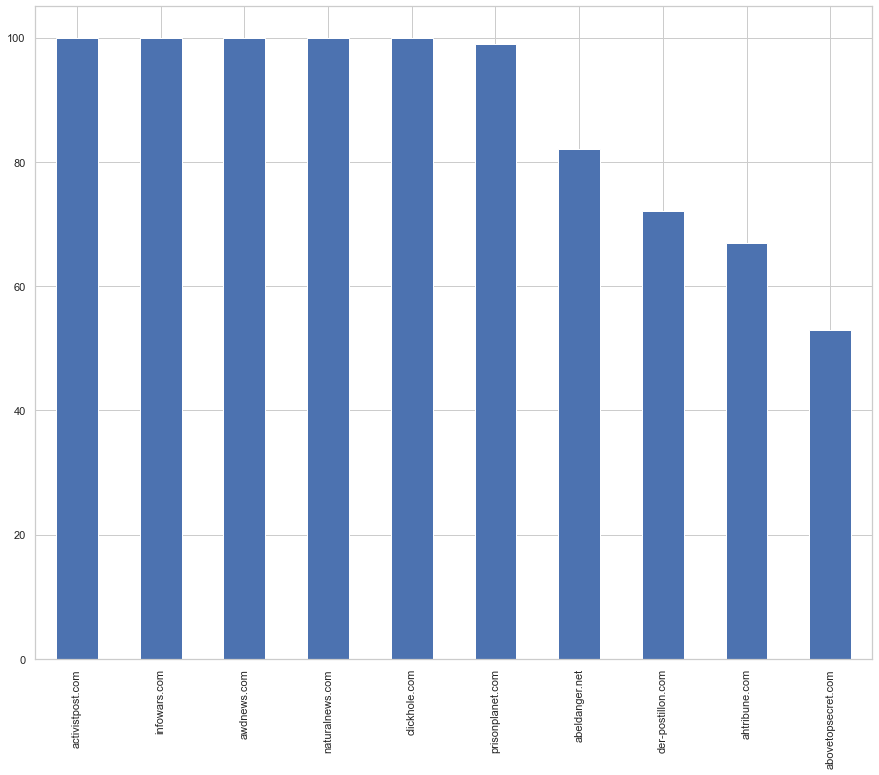

In [223]:
#Fake URL sites
dfnews.loc[dfnews.Real == 0].site_url.value_counts().head(10).plot(kind='bar');

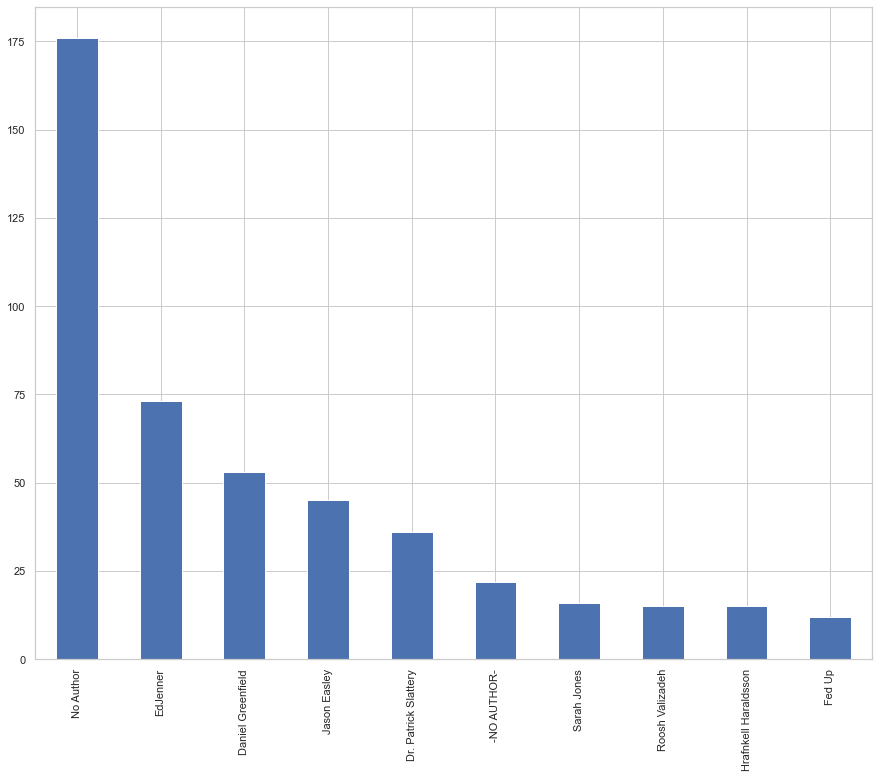

In [224]:
#Real Authors
dfnews.loc[dfnews.Real == 1].author.value_counts().head(10).plot(kind='bar');

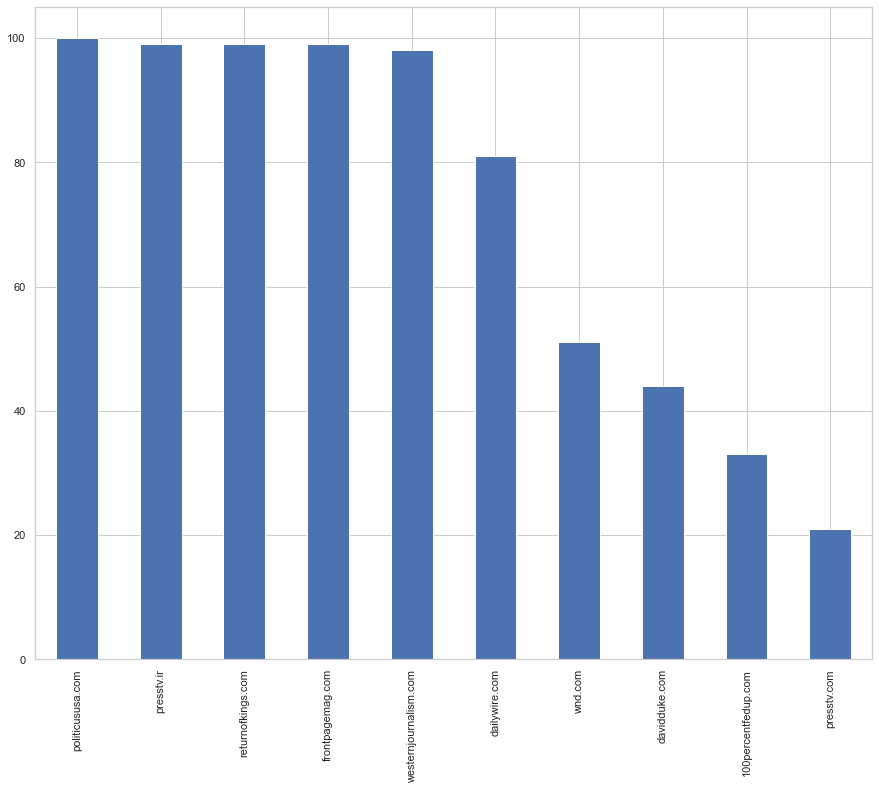

In [225]:
#Real URL sites
dfnews.loc[dfnews.Real == 1].site_url.value_counts().head(10).plot(kind='bar');

In [226]:
real = set(dfnews[dfnews['Real'] == 1]['site_url'].unique())
real

{'100percentfedup.com',
 'addictinginfo.org',
 'dailywire.com',
 'davidduke.com',
 'fromthetrenchesworldreport.com',
 'frontpagemag.com',
 'newstarget.com',
 'politicususa.com',
 'presstv.com',
 'presstv.ir',
 'prisonplanet.com',
 'proudemocrat.com',
 'redstatewatcher.com',
 'returnofkings.com',
 'washingtonsblog.com',
 'westernjournalism.com',
 'whydontyoutrythis.com',
 'wnd.com'}

In [227]:
fake = set(dfnews[dfnews['Real'] == 0]['site_url'].unique())

fake

{'21stcenturywire.com',
 'abcnews.com.co',
 'abeldanger.net',
 'abovetopsecret.com',
 'activistpost.com',
 'adobochronicles.com',
 'ahtribune.com',
 'allnewspipeline.com',
 'americannews.com',
 'americasfreedomfighters.com',
 'amren.com',
 'amtvmedia.com',
 'awdnews.com',
 'barenakedislam.com',
 'clickhole.com',
 'coasttocoastam.com',
 'corbettreport.com',
 'countercurrents.org',
 'counterpunch.org',
 'darkmoon.me',
 'davidduke.com',
 'davidstockmanscontracorner.com',
 'davidwolfe.com',
 'dcclothesline.com',
 'defenddemocracy.press',
 'dennismichaellynch.com',
 'departed.co',
 'der-postillon.com',
 'fromthetrenchesworldreport.com',
 'frontpagemag.com',
 'galacticconnection.com',
 'globalresearch.ca',
 'infowars.com',
 'intrepidreport.com',
 'legorafi.fr',
 'madworldnews.com',
 'naturalnews.com',
 'newstarget.com',
 'presstv.ir',
 'prisonplanet.com',
 'projectveritas.com',
 'returnofkings.com',
 'shiftfrequency.com',
 'thedailysheeple.com',
 'theeconomiccollapseblog.com',
 'thefreethoug

### Feature Engineering

In [228]:
#target is our column to be predicted and features are the columns that we will use for modelling
labels = dfnews.Real
features = dfnews[['author','site_url','text_without_stopwords']]

In [229]:
features

,author,site_url,text_without_stopwords
0,Barracuda Brigade,100percentfedup.com,print pay back money plus interest entire fami...
1,reasoning with facts,100percentfedup.com,attorney general loretta lynch plead fifth bar...
2,Barracuda Brigade,100percentfedup.com,red state fox news sunday reported morning ant...
3,Fed Up,100percentfedup.com,email kayla mueller prisoner tortured isis cha...
4,Fed Up,100percentfedup.com,email healthcare reform make america great sin...
...,...,...,...
2041,Matt Barber,wnd.com,check hillarythemed haunted house anticlinton ...
2042,Jane Chastain,wnd.com,good samaritan wearing indian headdress disarm...
2043,Michael Brown,wnd.com,skype sex scam fortune built shame moroccan bo...
2044,Ann Coulter,wnd.com,posted eddie skyhigh potency may scare away cr...


In [230]:
#since all the feature columns are text data, we want to use text mining techniques, we put all of them in the same column for ease of processing
features['combined_url_text'] = features["author"]+" "+features["site_url"] + " " + features["text_without_stopwords"]
features.drop(['author','site_url', 'text_without_stopwords'], axis = 1, inplace = True)
features=features.combined_url_text

In [231]:
features

0       Barracuda Brigade 100percentfedup.com print pa...
1       reasoning with facts 100percentfedup.com attor...
2       Barracuda Brigade 100percentfedup.com red stat...
3       Fed Up 100percentfedup.com email kayla mueller...
4       Fed Up 100percentfedup.com email healthcare re...
                              ...                        
2041    Matt Barber wnd.com check hillarythemed haunte...
2042    Jane Chastain wnd.com good samaritan wearing i...
2043    Michael Brown wnd.com skype sex scam fortune b...
2044    Ann Coulter wnd.com posted eddie skyhigh poten...
2045    Larry Elder wnd.com billion even known keeping...
Name: combined_url_text, Length: 2045, dtype: object

In [232]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_words = TfidfVectorizer(stop_words='english')
X = vectorizer_words.fit_transform(features)

In [233]:
#trying to cluster the 2 data centres ie fake and real news
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 100, n_init = 1, verbose = True)
km.fit(X)

Initialization complete
Iteration 0, inertia 3931.084929951696
Iteration 1, inertia 1997.8360674795867
Iteration 2, inertia 1993.0927907852524
Iteration 3, inertia 1992.774916037235
Iteration 4, inertia 1992.6297269048723
Iteration 5, inertia 1992.4931222558257
Iteration 6, inertia 1992.3662639440668
Iteration 7, inertia 1992.1800454117085
Iteration 8, inertia 1991.7304158353927
Iteration 9, inertia 1991.0393668556214
Iteration 10, inertia 1990.4822567762849
Iteration 11, inertia 1990.3863506250418
Iteration 12, inertia 1990.182019910975
Iteration 13, inertia 1990.1626751658212
Converged at iteration 13: strict convergence.


KMeans(max_iter=100, n_clusters=2, n_init=1, verbose=True)

In [234]:
import numpy as np
np.unique(km.labels_, return_counts=True)
features.reset_index(drop=True, inplace=True)

In [235]:
#Here we are collecting all the fake data into one cluster and all the real data into another.
#We are doing this as a pre step to the coming logic.
text={}
for i,cluster in enumerate(km.labels_):
    oneDocument = features[i]
    if cluster not in text.keys():
        text[cluster] = oneDocument
    else:
        text[cluster] += oneDocument

In [236]:
#importing nltk libraries for NLP tools
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from string import punctuation
from heapq import nlargest
import nltk 
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/developing/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/developing/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#finding the keywords that appear in both the clusters and we do not want to include the stop words as those will be the most frequent
_stopwords = set(stopwords.words('english') + list(punctuation))

keywords = {}
counts={}
for cluster in range(2):
    word_sent = word_tokenize(text[cluster].lower())
    word_sent=[word for word in word_sent if word not in _stopwords]
    freq = FreqDist(word_sent)
    keywords[cluster] = nlargest(100, freq, key=freq.get)
    counts[cluster]=freq

In [ ]:
keywords

In [237]:
# finding keyword that are uniques to each cluster
set0 = set(keywords[0])
set1 = set(keywords[1])
unique0=set0-set1
unique1 =set1-set0

In [238]:
unique_keys={}
unique_keys[0]=nlargest(10, unique0, key=counts[0].get)
unique_keys[1]=nlargest(10, unique1, key=counts[1].get)

In [239]:
unique_keys

{0: ['police',
  'der',
  'author',
  'life',
  'men',
  'man',
  'good',
  'want',
  'die',
  'food'],
 1: ['clinton',
  'hillary',
  'election',
  'campaign',
  'donald',
  'fbi',
  'clintons',
  'email',
  'emails',
  'trumps']}

# Models

In [240]:
#using the Vectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(features,labels,test_size=0.20,random_state=42)

vectorizer = TfidfVectorizer(stop_words = 'english')
tfidf_train = vectorizer.fit_transform(X_train)
tfidf_test = vectorizer.transform(X_test)
tfidf_df = pd.DataFrame(tfidf_train.A, columns=vectorizer.get_feature_names())

In [241]:
print(tfidf_train.shape)
print(y_train.shape)

(1636, 42141)
(1636,)


In [242]:
#KNN Classification model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

KNN = KNeighborsClassifier(n_neighbors=5)
KNb.fit(tfidf_train, y_train)
y_pred = KNb.predict(tfidf_test)
KNscore=metrics.accuracy_score(y_test,y_pred)
print("KNN Model accuracy: %0.4f" %KNscore)

KNN Model accuracy: 0.7188


In [243]:
#creating a confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[215  49]
 [ 66  79]]


In [244]:
#Random Forest Classification model
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=1000)
RF.fit(tfidf_train,y_train)
y_pred = RF.predict(tfidf_test)
RFscore = metrics.accuracy_score(y_test,y_pred)
print("RandomForest Model accuracy:  %0.4f" %RFscore)

RandomForest Model accuracy:  0.9413


In [245]:
#creating a confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[262   2]
 [ 22 123]]


In [246]:
#Adaboost Classification model
from   sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

Adab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),n_estimators=5)
history = Adab.fit(tfidf_train, y_train)
y_pred = Adab.predict(tfidf_test)
ABscore = metrics.accuracy_score(y_test,y_pred)
print("Adaboost Classifier accuracy: %0.4f" %ABscore)

Adaboost Classifier accuracy: 0.9878


### Result

In [247]:
#creating a confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[261   3]
 [  2 143]]


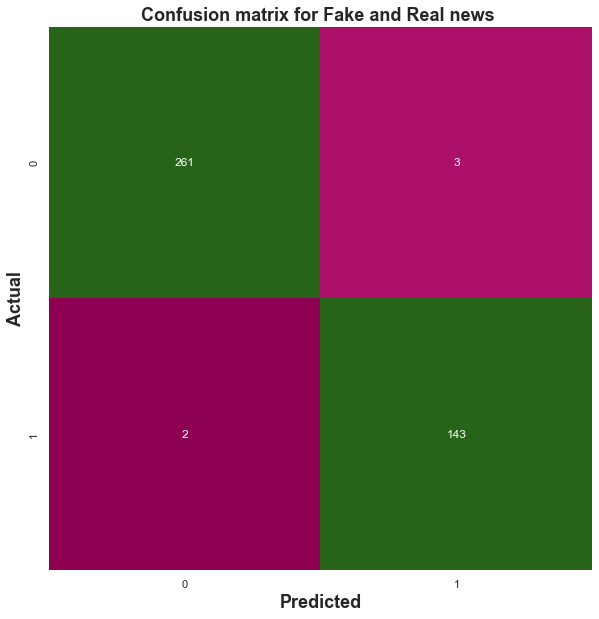

In [248]:
#creating a matrix using seaborn
import seaborn as sns

cm_df = pd.DataFrame(conf_matrix, columns=np.unique(y_test), index = np.unique(y_test))
cm_df.columns.name = 'Predicted'
cm_df.index.name = 'Actual'
cm_df
plt.figure(figsize=(10,10))

plt.xlabel('Predicted',fontdict = {'fontsize': 18},weight = 'bold')
plt.ylabel('Actual',fontdict = {'fontsize': 18},weight = 'bold')

plt.title('Confusion matrix for Fake and Real news ',fontdict = {'fontsize': 18},weight = 'bold')




sns.heatmap(cm_df, annot=True, vmax=20, square=True, cmap="PiYG",annot_kws={"size":12} ,cbar=False, fmt='g');






